In [2]:
from lcr.utils.data import filter_dict

In [3]:
import os
import pandas as pd
cur_dir = '/mnt/g/Yibing/Data/lcr/FFIEC/FFIEC CDR Call Bulk All Schedules 09302024'
files = os.listdir(cur_dir)
all_dfs = [
    pd.read_csv(os.path.join(cur_dir, file), sep='\t', low_memory=False, converters={'IDRSSD': str}, skiprows=lambda x: x in [1]).set_index('IDRSSD') for file in files if '09302024' in file and "Schedule" in file
]

In [4]:
df = pd.concat(all_dfs, axis=1, join='inner')

In [5]:
from lcr.replication.constants import NODE_LOAN_1Y, NODE_DERI_INFLOW
class Calculator():
    def __init__(self, df):
        self.df = df

    def compute(self, name, cols):
        pass

    def _check_valid(self, data):
        if isinstance(data, str):
            return self.df[data]
        elif isinstance(data, list):
            return pd.concat([self._check_valid(e) for e in data], axis=1).max(1)
        elif isinstance(data, tuple):
            return pd.concat([self._check_valid(e) for e in data], axis=1).sum(1)
            
cal = Calculator(df)
loan_1y = cal._check_valid(NODE_LOAN_1Y)
deri_in = cal._check_valid(NODE_DERI_INFLOW)

inflow = loan_1y * 0.5 / 12 + deri_in

('RCON2200', 'RCFN2200')

In [17]:
from lcr.replication.constants import *
## Fix duplilcated cols
s1_retail=0.5
s1_1m_q=1.0/3.0

deposit = cal._check_valid(DEPOSIT)
uninsured_deposit = cal._check_valid(UNINSURED_DEPOSIT)
uninsured_ratio = uninsured_deposit.div(deposit - uninsured_deposit)

trans_deposit_ipb = cal._check_valid(TRANSACTION_IND_COR).mean(1)
tdlt300k_3mp = cal._check_valid(TIME_DEPOSIT_LESS_250K_LESS_3M).mean(1)
saving_deposit = cal._check_valid(SAVING_DEPOSIT)
less_stable_deposit = 0.05 * trans_deposit_ipb * (1-uninsured_ratio)* s1_retail + 0.05*tdlt300k_3mp*s1_1m_q*(1-uninsured_ratio) + 0.05*saving_deposit*(1-uninsured_ratio)*s1_retail

stable_deposit = 0.10*trans_deposit_ipb*uninsured_ratio*s1_retail+ 0.10*tdlt300k_3mp*s1_1m_q*uninsured_ratio+ 0.10*saving_deposit*uninsured_ratio*s1_retail

In [61]:
cal._check_valid(("RCON6810", "RCON0352"))

IDRSSD
37          27548
242         28836
279        181260
354         19164
457         51220
            ...  
5859511         0
5860740     25990
5887420         0
5903517      1722
5972661         0
Length: 4572, dtype: int64

In [21]:
DEPOSIT = ('RCON2200', 'RCFN2200')        # RC-E Part 1 7
UNINSURED_DEPOSIT = 'RCON5597'  # RC-Q, Memo 2, estimated.

deposit = cal._check_valid(DEPOSIT)
uninsured_deposit = cal._check_valid(UNINSURED_DEPOSIT)
uninsured_ratio = (uninsured_deposit / (deposit - uninsured_deposit)).dropna()

,RCON6810,RCON6810
IDRSSD,,
37,3138,3138
242,6821,6821
279,47060,47060
354,7475,7475
457,17810,17810
...,...,...
5859511,0,0
5860740,12699,12699
5887420,0,0


In [34]:
cal._check_valid({"RCON6810", "RCON0352"})

In [7]:
dd = filter_dict('RCON', '3818')

In [8]:
# Load data
import os
def load_call_report(cur_dir):
    files = os.listdir(cur_dir)


,Mnemonic,Item Code,Start Date,End Date,Item Name,Confidentiality,ItemType,Reporting Form,Description,SeriesGlossary,Unnamed: 10
59212,RCON,3818,3/31/1990 12:00:00 AM,12/31/2000 12:00:00 AM,UNUSED COMMITMENTS - OTHER,N,F,FFIEC 032,Includes the unused portion of all other commi...,The mnemonic prefixes in this file represent ...,NaN
59213,RCON,3818,3/31/1990 12:00:00 AM,12/31/2000 12:00:00 AM,UNUSED COMMITMENTS - OTHER,N,F,FFIEC 033,Includes the unused portion of all other commi...,The mnemonic prefixes in this file represent ...,NaN
59214,RCON,3818,3/31/1990 12:00:00 AM,12/31/2000 12:00:00 AM,UNUSED COMMITMENTS - OTHER,N,F,FFIEC 034,Includes the unused portion of all other commi...,The mnemonic prefixes in this file represent ...,NaN
59215,RCON,3818,3/31/2001 12:00:00 AM,12/31/2009 12:00:00 AM,UNUSED COMMITMENTS - OTHER,N,F,FFIEC 041,Includes the unused portion of all other commi...,The mnemonic prefixes in this file represent ...,NaN
59216,RCON,3818,3/31/2010 12:00:00 AM,12/31/9999 12:00:00 AM,UNUSED COMMITMENTS - OTHER,N,D,FFIEC 041,Includes the unused portion of all other commi...,The mnemonic prefixes in this file represent ...,NaN


In [112]:
import os
import pandas as pd
cur_dir = '/mnt/g/Yibing/Data/lcr/FFIEC/FFIEC CDR Call Bulk All Schedules 09302024'
files = os.listdir(cur_dir)
all_dfs = [
    pd.read_csv(os.path.join(cur_dir, file), sep='\t', low_memory=False, converters={'IDRSSD': str}, skiprows=lambda x: x in [1]).set_index('IDRSSD') for file in files if '09302024' in file and "Schedule" in file
]


<Axes: >

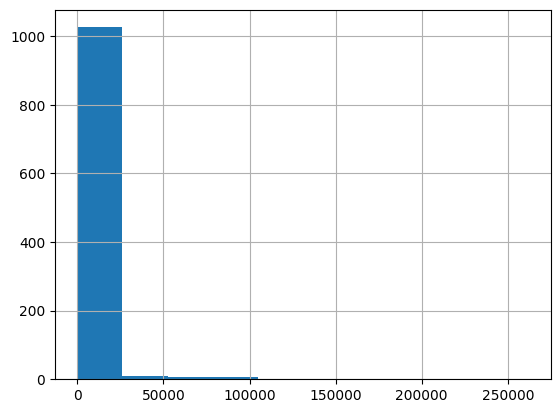

In [147]:
pd.concat(all_dfs, axis=1, join='inner')['RCON8733'].dropna().hist()

In [128]:
pd.read_csv('/mnt/g/Yibing/Data/lcr/FFIEC/FFIEC CDR Call Bulk All Schedules 09302024/FFIEC CDR Call Schedule RIE 09302024.txt', sep='\t').IDRSSD.unique()

array([nan, '37', '242', ..., '5887420', '5903517', '5972661'],
      dtype=object)

In [149]:
import os
cur_dir = '/mnt/g/Yibing/Data/lcr/FFIEC/FFIEC CDR Call Bulk All Schedules 09302024'
files = os.listdir(cur_dir)
all_dfs = [
    pd.read_csv(os.path.join(cur_dir, file), sep='\t', low_memory=False, converters={'IDRSSD': str}, skiprows=lambda x: x in [1]).set_index('IDRSSD') for file in files if '09302024' in file and "Schedule" in file
]
df = pd.concat(all_dfs, axis=1, join='inner')
#

In [150]:
import pandas as pd
from dataclasses import dataclass
from typing import Any, Union, Set, List
import ray
from lcr.replication.constants import *
@dataclass
class BaseNode():
    def __call__(self, df) -> pd.Series:
        pass

class sumNode(BaseNode):
    node_x: BaseNode
    node_y: BaseNode
    def __call__(self, df):
        return self.node_x(df) + self.node_y(df)

@dataclass
class Node(BaseNode):
    param: Union[Set[str], List[str], str]

    def __call__(self, df) -> pd.Series:
        if type(self.param) == str:
            return df[self.param]
        elif type(self.param) == set:
            return df[self.param].sum(axis=1)
        elif type(self.param) == list:
            return df[self.param].max(1)
        else:
            raise ValueError


    def __add__(self, y):
        return sumNode(node_x=self, node_y=y) 



,TEXT4086,TEXT8902,TEXT9116,TEXTB926,TEXTB962,TEXTB963,TEXTB964,TEXTC366,TEXTC367,TEXTC368,...,RCONFT15,RCONFT16,RCONHK18,RCONHK19,RIADC388,RIADC389,RIADC390,RIADF551,RIADF553,Unnamed: 28
IDRSSD,,,,,,,,,,,,,,,,,,,,,
37,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859511,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5860740,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5887420,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,CONF,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [89]:
pd.concat(all_dfs[:44], axis=1)['RCONC219']

IDRSSD
NaN        NOTNL AMT-GUARANTOR:GROSS POS FR VAL
37                                          NaN
242                                         NaN
279                                         NaN
354                                         NaN
                           ...                 
5859511                                     NaN
5860740                                     NaN
5887420                                       0
5903517                                     NaN
5972661                                     NaN
Name: RCONC219, Length: 4573, dtype: object

In [68]:
for i, e in enumerate(idxs):
    print(f"{i}: {e.shape}")

0: (4573,)
1: (4573,)
2: (4573,)
3: (4573,)
4: (4573,)
5: (4573,)
6: (4573,)
7: (4573,)
8: (4573,)
9: (4573,)
10: (4573,)
11: (4573,)
12: (4573,)
13: (4573,)
14: (4573,)
15: (4573,)
16: (4573,)
17: (4573,)
18: (4573,)
19: (4573,)
20: (4573,)
21: (4573,)
22: (4573,)
23: (4573,)
24: (4573,)
25: (4573,)
26: (4573,)
27: (4573,)
28: (4573,)
29: (4573,)
30: (4573,)
31: (4573,)
32: (4573,)
33: (4573,)
34: (4573,)
35: (4573,)
36: (4573,)
37: (4573,)
38: (4573,)
39: (4573,)
40: (4573,)
41: (4573,)
42: (4573,)
43: (4573,)
44: (4586,)
45: (4573,)


In [41]:
all_dfs[2].dropna

,Unnamed: 1
IDRSSD,


In [87]:
dd['Reporting Form'].unique()

array(['FFIEC 032', 'FFIEC 033', 'FFIEC 034'], dtype=object)

In [91]:
print(dd.Description.iloc[0])

In column D--20% risk weight; include the credit equivalent amount of securities lent that is supported by the appropriate amount of collateral that qualifies for the 20 percent risk weight under the risk based capital guidelines of the reporting bank s primary federal supervisory authority (refer to these guidelines for specific qualifying criteria). Also include the credit equivalent amount of securities lent that represents claims on U.S. and other OECD depository institutions (and claims on non-OECD depository institutions for securities lent with remaining maturities of one year or less).

NOTE:

Reported on Schedule RC-R Regulatory Capital for the FFIEC 031 and 041 reports.



For the UBPR series; the FDIC's Data Element name is H-SECL20P

This variable is used by the FDIC and OCC in the process to generate the UBPR in the Central Data Repository (CDR).  The Board does NOT store this MDRM within the UBPR series tables in the Board's Financial Data Repository (FDR).
 
 BAGR Origin

In [1]:
import pandas as pd
prefix='RCON'
code = 'C410'
dd = filter_dict(prefix, code)
with pd.option_context('max_colwidth', None):
    display(dd)

NameError: name 'filter_dict' is not defined

In [2]:
class Node:
    def __init__(self, fn):
        self.fn = fn

    def __call__(self, *args, **kwargs):
        return self.fn(*args, **kwargs)

@Node
def add_1(x):
    return x + 1

add_1(2)
# Returns 3

type(add_1)
# Returns __main__.Node

__main__.Node

In [12]:
dd[(dd['Item Code'] == '8786')]

,Mnemonic,Item Code,Start Date,End Date,Item Name,Confidentiality,ItemType,Reporting Form,Description,SeriesGlossary,Unnamed: 10
3093,AMLB,8786,9/26/1979 12:00:00 AM,9/26/1979 12:00:00 AM,REPORTING LEVEL CODE,Y,F,FR 2413y,Effective 10/24/2011; the FR 2572 information ...,The following items may be accessed by the fol...,NaN
3113,AMLW,8786,10/17/1979 12:00:00 AM,7/9/1980 12:00:00 AM,REPORTING LEVEL CODE,Y,F,FR 2413c,Effective 10/24/2011; the FR 2572 information ...,The following items may be accessed by the fol...,NaN
8873,CALL,8786,12/31/1978 12:00:00 AM,12/31/9999 12:00:00 AM,REPORTING LEVEL CODE,Y,S,FR 2886b,Effective 10/24/2011; the FR 2572 information ...,\r\nThe following items may be accessed by the...,NaN
8874,CALL,8786,6/30/1980 12:00:00 AM,12/31/9999 12:00:00 AM,REPORTING LEVEL CODE,N,S,FFIEC 002,Effective 10/24/2011; the FR 2572 information ...,\r\nThe following items may be accessed by the...,NaN
8875,CALL,8786,12/31/1981 12:00:00 AM,9/30/1996 12:00:00 AM,REPORTING LEVEL CODE,Y,F,FR 2886a,Effective 10/24/2011; the FR 2572 information ...,\r\nThe following items may be accessed by the...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
86454,WRBK,8786,7/8/1959 12:00:00 AM,6/24/2009 12:00:00 AM,REPORTING LEVEL CODE,Y,F,FR 2416,Effective 10/24/2011; the FR 2572 information ...,,NaN
86480,WRIS,8786,1/3/1979 12:00:00 AM,12/31/9999 12:00:00 AM,REPORTING LEVEL CODE,Y,F,FR 2644,Effective 10/24/2011; the FR 2572 information ...,NaN,NaN
86542,WRJI,8786,7/8/1959 12:00:00 AM,12/31/9999 12:00:00 AM,REPORTING LEVEL CODE,Y,F,FR 2416,Effective 10/24/2011; the FR 2572 information ...,NaN,NaN
86745,WRPS,8786,7/22/1986 12:00:00 AM,6/23/1997 12:00:00 AM,REPORTING LEVEL CODE,Y,F,FR 2415t,Effective 10/24/2011; the FR 2572 information ...,The following items may be accessed by the fo...,NaN


In [72]:
data = pd.read_csv('/mnt/g/Yibing/Data/lcr/FFIEC/call_report/FFIEC CDR Call Bulk Subset of Schedules 2021/FFIEC CDR Call Subset of Schedules 2021(2 of 2).txt', sep='\t', low_memory=False)

In [73]:
'RCON2210' in list(data.columns)

False